# Profitable App Profiles for the App Store and Google Play Markets

Our aim in this project is to find mobile free app profiles that are profitable for the App Store and Google Play markets in order to understand what kinds of apps are likely to attract more users and are more suitable to buld. We will use the follow datasets:

- __[A dataset](https://www.kaggle.com/lava18/google-play-store-apps)__ containing data about approximately ten thousand Android apps from Google Play. 
- __[A dataset](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps)__ containing data about approximately seven thousand iOS apps from the App Store.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
android = pd.read_csv('googleplaystore.csv')
ios = pd.read_csv('AppleStore.csv')

In [3]:
android.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


We convert *Reviews* variable into a float variable:

In [5]:
ios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(8), object(5)
memory 

In [6]:
ios.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


Since *id* variable identify every single app, we convert it into an object variable:

# Deleting wrong data

The Google Play data set has a dedicated __[discussion section]('https://www.kaggle.com/lava18/google-play-store-apps/discussion')__, and we can see that __[one of the discussions]('https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015')__ outlines an error for row 10472. Let's print this row and compare it against the header and another row that is correct.

In [7]:
android.iloc[10472,:]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

The row 10472 corresponds to the app *Life Made WI-Fi Touchscreen Photo Frame*, and we can see that the rating is 19. This is clearly off because the maximum rating for a Google Play app is 5 (as mentioned in the __[discussions section]('https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015')__, this problem is caused by a missing value in the 'Category' column). As a consequence, we'll delete this row.

In [8]:
print(len(android))
android = android.drop(10472).reset_index(drop=True)
print(len(android))

10841
10840


# Removing Duplicate Entries

In [9]:
ios.describe(include=['O'])

,track_name,currency,ver,cont_rating,prime_genre
count,7197,7197,7197,7197,7197
unique,7195,1,1590,4,23
top,Mannequin Challenge,USD,1.0,4+,Games
freq,2,7197,317,4433,3862


iOS dataset doesn't show any duplictated apps, so we consider Android dataset.

In [10]:
android.describe(include=['O'])

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10840,10840,10840,10840,10840,10839,10840,10840,10840,10840,10832,10838
unique,9659,33,6001,461,21,2,92,6,119,1377,2831,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


We can see that the Android dataset has 9659 unique apps, but 10840 elements. Tthere are 1181 cases where an app occurs more than once. For instance, the application Instagram has four entries:

In [11]:
android[android.App=='Instagram']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


We don't want to count certain apps more than once when we analyze data, so we need to remove the duplicate entries and keep only one entry per app. One thing we could do is remove the duplicate rows randomly, however if you examine the rows we printed two cells above for the Instagram app, the main difference happens on the column of number of reviews.

We won't remove rows randomly, but rather we'll keep the rows that have the highest number of reviews because the higher the number of reviews, the more reliable the ratings.

In [12]:
dupl_app = android.App[android.App.duplicated()].unique().tolist()
dupl_app[:5]

['Quick PDF Scanner + OCR FREE',
 'Box',
 'Google My Business',
 'ZOOM Cloud Meetings',
 'join.me - Simple Meetings']

In [13]:
android['Reviews'] = android['Reviews'].astype('float')

single_apps = {}
for i in range(len(android)):
    app = android.loc[i,'App']
    reviews = android.loc[i,'Reviews']
   
    if app in single_apps and single_apps[app] < reviews:
        single_apps[app] = reviews
        
    elif app not in single_apps:
        single_apps[app] = reviews


print('Expected length:', len(android) - 1181)
print('Actual length:', len(single_apps))

Expected length: 9659
Actual length: 9659


In [14]:
android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [15]:
index = np.zeros(len(android), dtype=bool)
for app, reviews in single_apps.items():
    select_row = (android.App == app) & (android.Reviews == reviews)
    index |= select_row
    
index.sum()

10054

There are aleady some duplicated apps to eliminate:

In [16]:
android_clean = android.copy()
android_clean = android_clean[index].reset_index(drop=True)
android_clean = android_clean[~android_clean.App.duplicated()]

android_clean.describe(include=['O'])

,App,Category,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9659,9659,9659,9659,9658,9659,9659,9659,9659,9651,9657
unique,9659,33,461,21,2,92,6,118,1377,2819,33
top,Real DJ Simulator,FAMILY,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,1,1874,1228,1417,8904,8905,7903,828,252,1055,2205


In [17]:
android_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10053
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   float64
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


# Removing Non-English Apps

If we explore the data sets enough, it is possible to notice the names of some of the apps suggest they are not directed toward an English-speaking audience. Below, we see a couple of examples from both data sets:

In [18]:
print('Android apps with non-english name: \n', android_clean.loc[[4785, 8334], 'App'])
print('\n')
print('iOS apps with non-english name: \n', ios.loc[[813, 6731], 'track_name'])

Android apps with non-english name: 
 4785    QR Droid
8334     chat dz
Name: App, dtype: object


iOS apps with non-english name: 
 813                     爱奇艺PPS -《欢乐颂2》电视剧热播
6731    【脱出ゲーム】絶対に最後までプレイしないで 〜謎解き＆ブロックパズル〜
Name: track_name, dtype: object


We're not interested in keeping these kind of apps, so we'll remove them. One way to go about this is to remove each app whose name contains a symbol that is not commonly used in English text — English text usually includes letters from the English alphabet, numbers composed of digits from 0 to 9, punctuation marks (., !, ?, ;, etc.), and other symbols (+, *, /, etc.).

We built this function below, and we use the built-in _ord()_ function to find out the corresponding encoding number of each character: 

In [19]:
def is_english(string):
    non_ascii = 0
    
    for character in string:
        if ord(character) > 127:
            non_ascii += 1
    if non_ascii > 3:
        return False
    else:
        return True

print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))

True
False


(to minimize the impact of data loss, we'll only remove an app if its name has more than three non-ASCII characters)

In [20]:
android_english = android_clean.copy()
android_english = android_english[android_english.App.apply(is_english)]

ios_english = ios.copy()
ios_english = ios_english[ios_english.track_name.apply(is_english)]

print('Android dataset number of rows:', len(android_english))
print('iOS dataset number of rows:', len(ios_english))

Android dataset number of rows: 9614
iOS dataset number of rows: 6183


# Isolating the Free Apps

As we mentioned in the introduction, we only build apps that are free to download and install. 

In [128]:
android_final = android_english.copy()
android_final = android_final[android_final.Price=='0']

ios_final = ios_english.copy()
ios_final = ios_final[ios_final.price==0.0]

print('Android dataset number of rows:', len(android_final))
print('iOS dataset number of rows:', len(ios_final))

Android dataset number of rows: 8864
iOS dataset number of rows: 3222


We're left with 8864 Android apps and 3222 iOS apps, which should be enough for our analysis.

# Most Common Apps by Genre

### App Store (iOS apps)

In [129]:
value_counts_ios = ios_final.prime_genre.value_counts(normalize=True)*100

print('The percentages of the first 10 genres for iOS apps:\n')
print(value_counts_ios[:10])

The percentages of the first 10 genres for iOS apps:

Games                58.162632
Entertainment         7.883302
Photo & Video         4.965860
Education             3.662322
Social Networking     3.289882
Shopping              2.607076
Utilities             2.513966
Sports                2.141527
Music                 2.048417
Health & Fitness      2.017381
Name: prime_genre, dtype: float64


We can see that among the free English apps, more than a half (58.16%) are games. Entertainment apps are close to 8%, followed by photo and video apps, which are close to 5%. Only 3.66% of the apps are designed for education, followed by social networking apps which amount for 3.29% of the apps in our dataset. The general impression is that App Store (at least the part containing free English apps) is dominated by apps that are designed for fun (games, entertainment, photo and video, social networking, sports, music, etc.), while apps with practical purposes (education, shopping, utilities, productivity, lifestyle, etc.) are more rare. However, the fact that fun apps are the most numerous doesn't also imply that they also have the greatest number of users — the demand might not be the same as the offer.

### Google Play (android apps)

In [130]:
value_counts_android_cat = android_final.Category.value_counts(normalize=False)#*100

print('The percentages of the first 10 categories for android apps:\n')
print(value_counts_android_cat[:10])
print('\nNumber of categories:', len(value_counts_android_cat))

The percentages of the first 10 categories for android apps:

FAMILY             1676
GAME                862
TOOLS               750
BUSINESS            407
LIFESTYLE           346
PRODUCTIVITY        345
FINANCE             328
MEDICAL             313
SPORTS              301
PERSONALIZATION     294
Name: Category, dtype: int64

Number of categories: 33


In [131]:
android_final.Genres[android_final.Category=='FAMILY'].value_counts()[:10]

Entertainment            458
Education                382
Simulation               174
Casual                   134
Puzzle                    78
Role Playing              72
Strategy                  66
Educational;Education     35
Educational               33
Education;Education       24
Name: Genres, dtype: int64

The landscape seems significantly different on Google Play: it seems that a good number of apps are designed for practical purposes (family, tools, business, lifestyle, productivity, etc.). However, if we investigate this further, we can see that the family category (which accounts for almost 19% of the apps) means mostly games for kids.

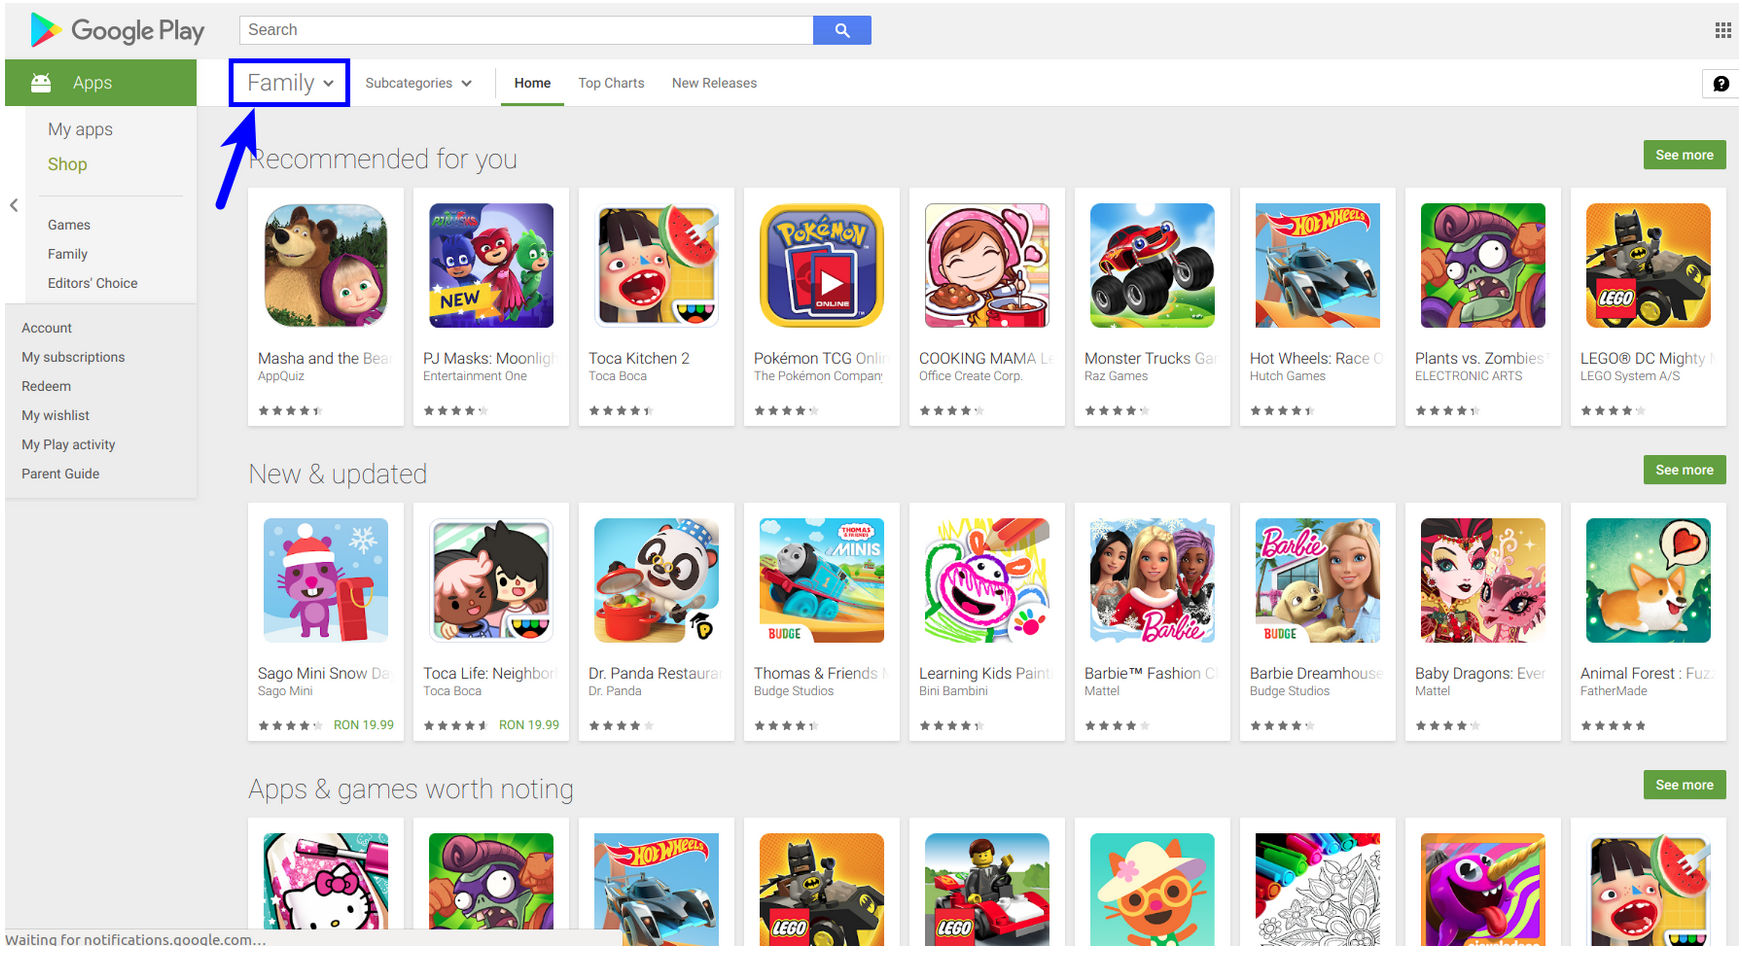

In [132]:
value_counts_android_gen = android_final.Genres.value_counts(normalize=True)*100

print('The percentages of the first 10 genres for android apps:\n')
print(value_counts_android_gen[:10])
print('\nNumber of genres:', len(value_counts_android_gen))

The percentages of the first 10 genres for android apps:

Tools              8.449910
Entertainment      6.069495
Education          5.347473
Business           4.591606
Lifestyle          3.892148
Productivity       3.892148
Finance            3.700361
Medical            3.531137
Sports             3.463448
Personalization    3.316787
Name: Genres, dtype: float64

Number of genres: 114


The difference between the *Genres* and the *Category* columns is not crystal clear, but one thing we can notice is that the *Genres* column is much more granular (it has more categories). We're only looking for the bigger picture at the moment, so we'll only work with the *Category* column moving forward.

Up to this point, we found that the App Store is dominated by apps designed for fun, while Google Play shows a more balanced landscape of both practical and for-fun apps. Now we'd like to get an idea about the kind of apps that have most users.

# Most Popular Apps by Genre on the App Store

One way to find out what genres are the most popular (have the most users) is to calculate the average number of installs for each app genre. For the Google Play data set, we can find this information in the *Installs* column, but for the App Store data set this information is missing. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the *rating_count_tot* app.

Below, we calculate the average number of user ratings per app genre on the App Store:

In [49]:
ios_genre = ios_final.groupby('prime_genre')['rating_count_tot'].mean().sort_values(ascending=False)
ios_genre

prime_genre
Navigation           86090.333333
Reference            74942.111111
Social Networking    71548.349057
Music                57326.530303
Weather              52279.892857
Book                 39758.500000
Food & Drink         33333.923077
Finance              31467.944444
Photo & Video        28441.543750
Travel               28243.800000
Shopping             26919.690476
Health & Fitness     23298.015385
Sports               23008.898551
Games                22788.669691
News                 21248.023256
Productivity         21028.410714
Utilities            18684.456790
Lifestyle            16485.764706
Entertainment        14029.830709
Business              7491.117647
Education             7003.983051
Catalogs              4004.000000
Medical                612.000000
Name: rating_count_tot, dtype: float64

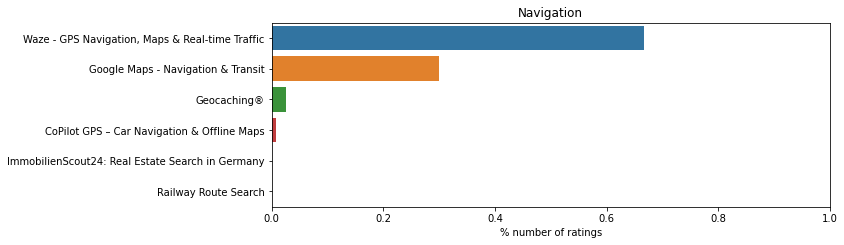

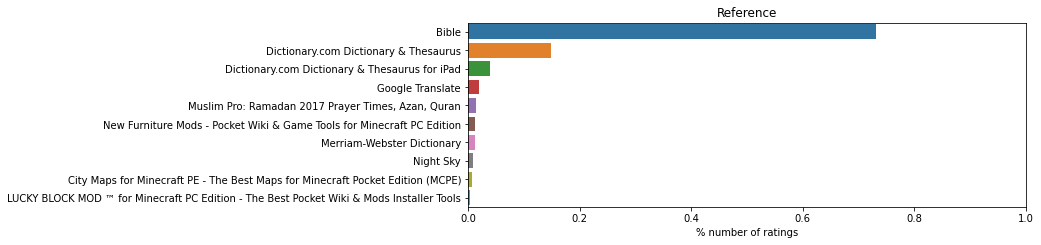

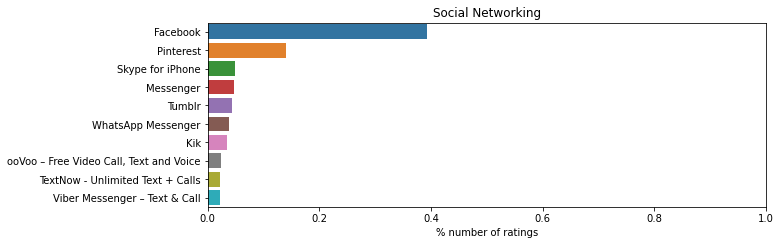

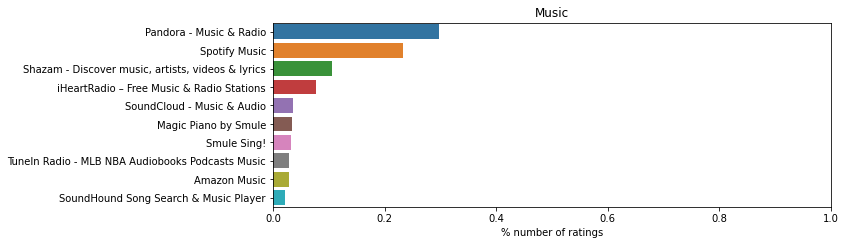

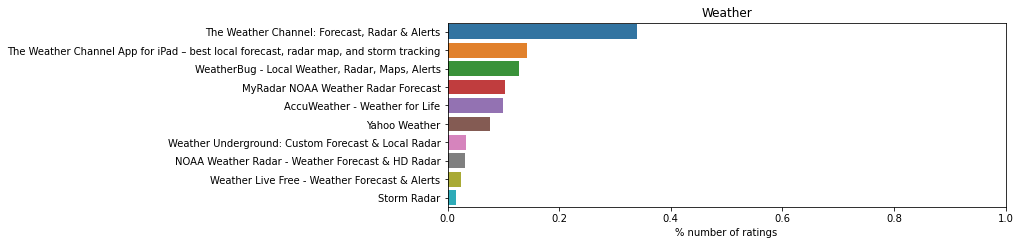

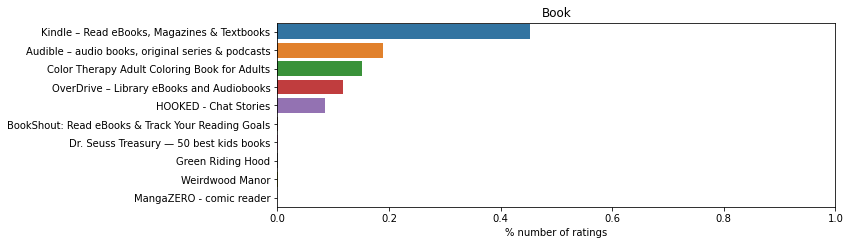

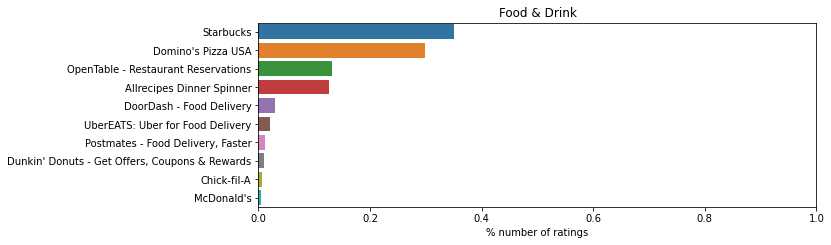

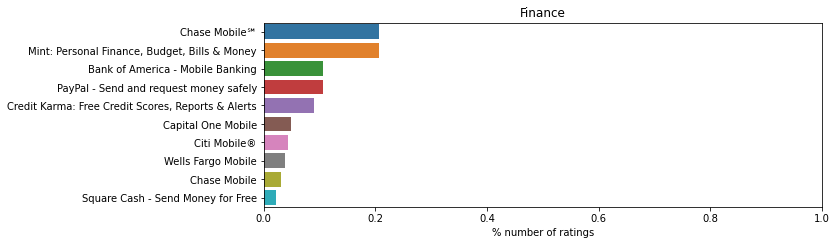

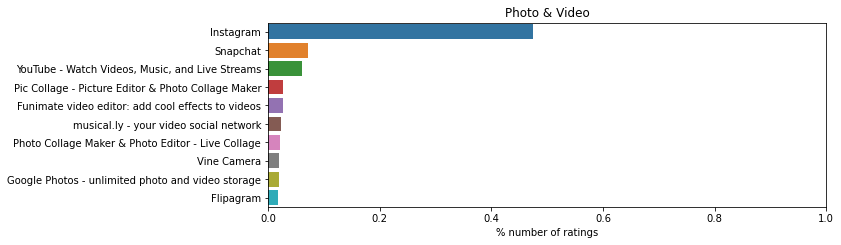

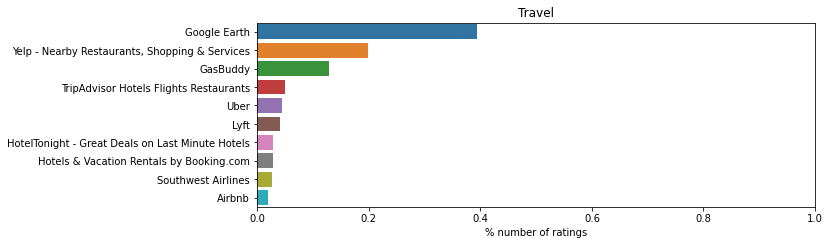

In [116]:
for i, genre in enumerate(ios_genre.index[:10]):
    plt.figure(figsize=(10,40))
    plt.subplot(10,1,i+1)

    data = ios_final[['track_name', 'rating_count_tot']][ios_final.prime_genre==genre].sort_values(
            'rating_count_tot', ascending=False).head(10)
    data['rating_count_tot'] = data['rating_count_tot']/sum(ios_final['rating_count_tot'][ios_final.prime_genre==genre])
    
    sb.barplot(y='track_name', x='rating_count_tot', data = data)
    plt.xlim(0,1)
    plt.title(genre)
    plt.ylabel('')
    plt.xlabel('% number of ratings')

    plt.show()

On average, navigation apps have the highest number of user reviews, but this figure is heavily influenced by Waze and Google Maps, which have close to half a million user reviews together. The same pattern applies to social networking apps, where the average number is heavily influenced by a few giants like Facebook, Pinterest, Skype, etc. Same applies to music apps, where a few big players like Pandora, Spotify, and Shazam heavily influence the average number.

Our aim is to find popular genres, but navigation, social networking or music apps might seem more popular than they really are. The average number of ratings seem to be skewed by very few apps which have hundreds of thousands of user ratings, while the other apps may struggle to get past the 10,000 threshold. 

Reference apps have 74,942 user ratings on average, but it's actually the Bible and Dictionary.com which skew up the average rating. However, this niche seems to show some potential. One thing it is possible to do is take another popular book and turn it into an app where people could add different features besides the raw version of the book. 

This idea seems to fit well with the fact that the App Store is dominated by for-fun apps. This suggests the market might be a bit saturated with for-fun apps, which means a practical app might have more of a chance to stand out among the huge number of apps on the App Store.

Other genres that seem popular include weather, book, food and drink, or finance. The book genre seem to overlap a bit with the app idea we described above, but the other genres:
- Weather apps — people generally don't spend too much time in-app, and the chances of making profit from in-app adds are low. Also, getting reliable live weather data may require us to connect our apps to non-free APIs.
- Food and drink — examples here include Starbucks, Dunkin' Donuts, McDonald's, etc. So making a popular food and drink app requires actual cooking and a delivery service, which is outside the scope of our project.
- Finance apps — these apps involve banking, paying bills, money transfer, etc. Building a finance app requires domain knowledge and you don't want to hire a finance expert just to build an app.

Now let's analyze the Google Play market a bit.

# Most Popular Apps by Category on Google Play

For the Google Play market, we actually have data about the number of installs, so we should be able to get a clearer picture about genre popularity. However, the install numbers don't seem precise enough — we can see that most values are open-ended (100+, 1,000+, 5,000+, etc.).

In [133]:
android_final.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up


To perform computations, however, we'll need to convert each install number to float — this means that we need to remove the commas and the plus characters, otherwise the conversion will fail and raise an error. 

In [134]:
android_copy = android_final.copy()
android_copy['Installs'] = android_copy['Installs'].str.replace(',', '').str.replace('+', '').astype('float')

android_copy.groupby('Category').mean()

In [135]:
android_copy.groupby('Category').mean()

,Rating,Reviews,Installs
Category,,,
ART_AND_DESIGN,4.338182,24699.421053,1.986335e+06
AUTO_AND_VEHICLES,4.184722,14140.280488,6.473178e+05
BEAUTY,4.278571,7476.226415,5.131519e+05
BOOKS_AND_REFERENCE,4.347799,87995.068421,8.767812e+06
BUSINESS,4.103953,24239.727273,1.712290e+06
COMICS,4.177358,42585.618182,8.176573e+05
COMMUNICATION,4.126923,995608.463415,3.845612e+07
DATING,3.982443,21953.272727,8.540288e+05
EDUCATION,4.340196,56293.097087,1.833495e+06


On average, communication apps have the most installs: 38,456,119. This number is heavily skewed up by a few apps that have over one billion installs (WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail, and Hangouts), and a few others with over 100 and 500 million installs:

In [180]:
communication_df = android_copy[android_copy.Category=='COMMUNICATION']
print('Number of communication apps with 100 million or more installs VS Number of total communication apps:') 
print(len(communication_df[communication_df.Installs > 99999999]), 'VS', len(communication_df), '\n')
communication_df.sort_values('Installs', ascending=False).head(6)

Number of communication apps with 100 million or more installs VS Number of total communication apps:
27 VS 287 



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
310,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
336,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
393,Hangouts,COMMUNICATION,4.0,3419513.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
353,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Skype - free IM & video calls,COMMUNICATION,4.1,10484169.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
381,Gmail,COMMUNICATION,4.3,4604483.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device


If we removed all the communication apps that have over 100 million installs, the average would be reduced roughly ten times:

In [191]:
under_100M = communication_df['Installs'][communication_df.Installs < 100000000]
print('Average number of installs for comunication apps without apps with 100 million or more installs:', round(sum(under_100M)/len(under_100M)))

Average number of installs for comunication apps without apps with 100 million or more installs: 3603485


We see the same pattern for the video players category, which is the runner-up with 24,727,872 installs. The market is dominated by apps like Youtube, Google Play Movies & TV, or MX Player. The pattern is repeated for social apps (where we have giants like Facebook, Instagram, Google+, etc.), photography apps (Google Photos and other popular photo editors), or productivity apps (Microsoft Word, Dropbox, Google Calendar, Evernote, etc.).

Again, the main concern is that these app genres might seem more popular than they really are. Moreover, these niches seem to be dominated by a few giants who are hard to compete against.

The game genre seems pretty popular, but previously we found out this part of the market seems a bit saturated, so we'd like to come up with a different app recommendation if possible.

The books and reference genre looks fairly popular as well, with an average number of installs of 8,767,812. It's interesting to explore this in more depth, since we found this genre has some potential to work well on the App Store, and our aim is to recommend an app genre that shows potential for being profitable on both the App Store and Google Play.

Let's take a look of this genre and their number of installs:

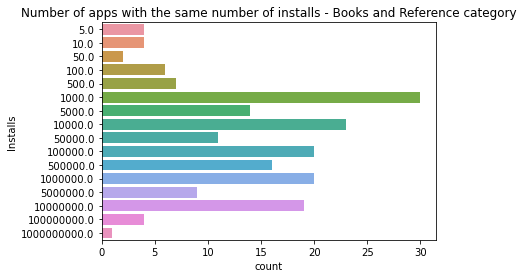

In [224]:
BookRef_df = android_copy[android_copy.Category=='BOOKS_AND_REFERENCE'].sort_values(by='Installs', ascending=False)
sb.countplot(y='Installs', data=BookRef_df)
plt.title('Number of apps with the same number of installs - Books and Reference category')
plt.show()

It seems there's still a small number of extremely popular apps that skew the average:

In [225]:
print('Total number of apps of Books and Reference category:', len(BookRef_df), '\n')
print('Popular apps of Books and Reference category with more than 100 million installs:')
BookRef_df[BookRef_df.Installs > 99999999]

Total number of apps of Books and Reference category: 190 

Popular apps of Books and Reference category with more than 100 million installs:


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
144,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,Varies with device,1.000000e+09,Free,0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
4017,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2915189.0,Varies with device,1.000000e+08,Free,0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
4909,Audiobooks from Audible,BOOKS_AND_REFERENCE,4.5,568922.0,Varies with device,1.000000e+08,Free,0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
3336,Bible,BOOKS_AND_REFERENCE,4.7,2440695.0,Varies with device,1.000000e+08,Free,0,Teen,Books & Reference,"August 2, 2018",Varies with device,Varies with device
3448,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814151.0,Varies with device,1.000000e+08,Free,0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device


However, it looks like there are only a few very popular apps, so this market still shows potential. Let's try to get some app ideas based on the kind of apps that are somewhere in the middle in terms of popularity (between 1,000,000 and 100,000,000 downloads):

In [228]:
print('Number of apps of Books and Reference category between 1,000,000 and 100,000,000 downloads:', 
      len(BookRef_df[ np.logical_and(1000000.0 < BookRef_df.Installs, BookRef_df.Installs < 100000000.0) ]))
BookRef_df[ np.logical_and(1000000.0 < BookRef_df.Installs, BookRef_df.Installs < 100000000.0) ]

Number of apps of Books and Reference category between 1,000,000 and 100,000,000 downloads: 28


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3456,Aldiko Book Reader,BOOKS_AND_REFERENCE,4.2,210534.0,22M,10000000.0,Free,0,Everyone,Books & Reference,"June 13, 2018",3.0.58,4.0 and up
5539,English Dictionary - Offline,BOOKS_AND_REFERENCE,4.4,341234.0,30M,10000000.0,Free,0,Everyone 10+,Books & Reference,"March 20, 2018",3.9.1,4.2 and up
8857,Oxford Dictionary of English : Free,BOOKS_AND_REFERENCE,4.1,364452.0,7.1M,10000000.0,Free,0,Everyone,Books & Reference,"July 11, 2018",9.1.363,4.1 and up
8840,JW Library,BOOKS_AND_REFERENCE,4.9,922752.0,Varies with device,10000000.0,Free,0,Everyone,Books & Reference,"June 15, 2018",Varies with device,Varies with device
8836,Dictionary - Merriam-Webster,BOOKS_AND_REFERENCE,4.5,454412.0,Varies with device,10000000.0,Free,0,Everyone,Books & Reference,"May 18, 2018",Varies with device,Varies with device
8785,Spanish English Translator,BOOKS_AND_REFERENCE,4.2,87919.0,Varies with device,10000000.0,Free,0,Teen,Books & Reference,"May 28, 2018",Varies with device,Varies with device
162,HTC Help,BOOKS_AND_REFERENCE,4.2,8342.0,Varies with device,10000000.0,Free,0,Everyone,Books & Reference,"August 28, 2017",9.00.950462,7.0 and up
8858,English Hindi Dictionary,BOOKS_AND_REFERENCE,4.4,384368.0,Varies with device,10000000.0,Free,0,Everyone,Books & Reference,"August 4, 2018",Varies with device,Varies with device
4597,Al-Quran (Free),BOOKS_AND_REFERENCE,4.6,218451.0,4.7M,10000000.0,Free,0,Everyone,Books & Reference,"May 20, 2018",3.2.3,4.0 and up
4601,Al Quran Indonesia,BOOKS_AND_REFERENCE,4.8,445756.0,16M,10000000.0,Free,0,Everyone,Books & Reference,"May 15, 2018",2.6.22,4.0 and up


This niche seems to be dominated by software for processing and reading ebooks, as well as various collections of libraries and dictionaries, so it's probably not a good idea to build similar apps since there'll be some significant competition.

We also can notice there are quite a few apps built around the book Quran, which suggests that building an app around a popular book can be profitable. It seems that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets.

# Conclusion

In this project, I analyzed data about the App Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets.

We can conclude that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets. The markets are already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.